In [3]:
#Some useful imports
import numpy as np
import pims
import skimage.filters as filters
import os
import matplotlib.pyplot as plt
from PIL import Image

In [4]:

folder_name = 'Kennard_ImageSequences_ForPythonClub20190423'
subfolder_name = 'StackAsImageSequence'
someFile_name = '20190312_40x_ebgPositive_Wounding_1_MMStack_Pos0.ome-20085.tif'
im_name = os.path.join(os.getcwd(),folder_name,subfolder_name, someFile_name)
Im = Image.open(im_name)

stack_name = 'imageStack.tif'
imStack_name = os.path.join(os.getcwd(),folder_name,stack_name)
Im_stack = pims.open(imStack_name)

D:\D_program_files\Anaconda3\lib\site-packages\pims\api.py:191: UserWarning: <class 'pims.tiff_stack.TiffStack_tifffile'> errored: 'NoneType' object has no attribute 'TiffFile'
  warn(message)
D:\D_program_files\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
D:\D_program_files\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
D:\D_program_files\Anaconda3\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
D:\D_program_files\Anaconda3\lib\site-packages\imageio\plugins\_tifffile

In [5]:
#How many images are in the sequence? 
print( Im_stack  )  

<Frames>
Length: 213 frames
Frame Shape: 512 x 512
Pixel Datatype: uint8


time to create stack in 1.237978458404541 seconds, slightly faster? 
time to do min,max 1.3767261505126953 seconds, 2 times faster


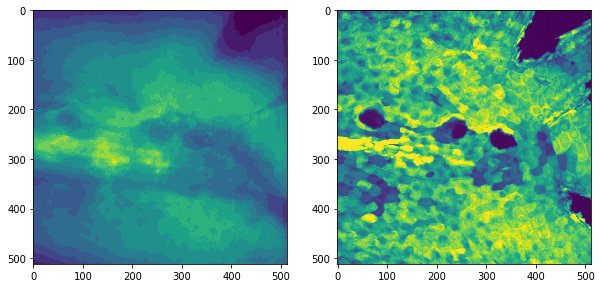

In [40]:
# Create a max and median projection

import time
xy_shapes = Im_stack[0].shape
num_frames = len( Im_stack)

start_time = time.time() 
# full_z_stack = np.zeros( xy_shapes + (len( Im_stack),))
full_z_stack = np.full( xy_shapes + (len( Im_stack),),  np.nan , 'uint8')

for k,im in enumerate(Im_stack):
    full_z_stack[:,:,k] = im;
print("time to create stack in %s seconds, slightly faster? " % (time.time() - start_time))
    
    
start_time = time.time() 
median_z_image = np.median(full_z_stack,axis=2)
max_z_image = np.max(full_z_stack,axis=2) 
print("time to do min,max %s seconds, 2 times faster" % (time.time() - start_time))
    
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(median_z_image)
axs[1].imshow(max_z_image)

plt.show()

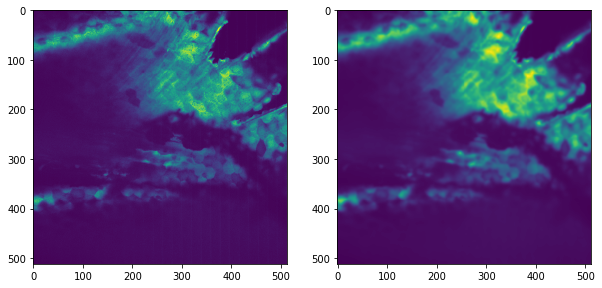

In [22]:
# Apply a gaussian filter to the full z stack
full_stack_smooth = filters.gaussian(full_z_stack,sigma=(2,2,1))
z_to_show = 100

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(full_z_stack[:,:,z_to_show])
axs[1].imshow(full_stack_smooth[:,:,z_to_show])
plt.show()